In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2

In [2]:
PATH = "./NIHSampleXray/"
images = glob(os.path.join(PATH,"images", "*.png"))

# images[0:10]

In [3]:
labels = pd.read_csv('./NIHSampleXray/sample_labels.csv')
len(labels)
#labels.head(3)

5606

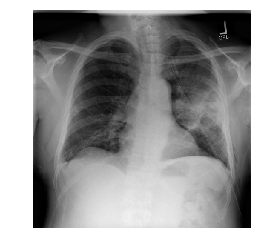

In [4]:
%matplotlib inline
image_name = "./NIHSampleXray/images/00001256_007.png" 
def plotImage(image_name):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

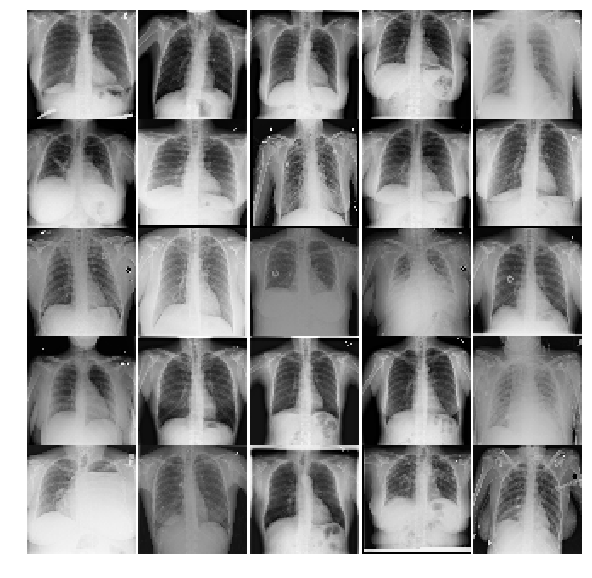

In [5]:
%matplotlib inline
# Plot Multiple Images
simpsons = glob('./NIHSampleXray/images/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in simpsons[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (64, 64)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

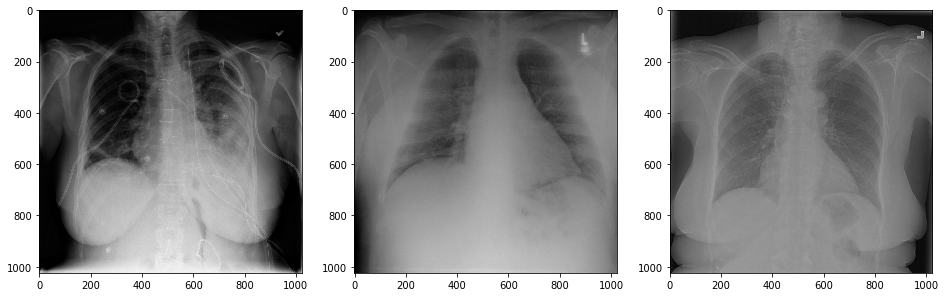

In [6]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
plt.subplot(132)
plt.imshow(cv2.imread(r[1]))
plt.subplot(133)
plt.imshow(cv2.imread(r[2]));

No handles with labels found to put in legend.


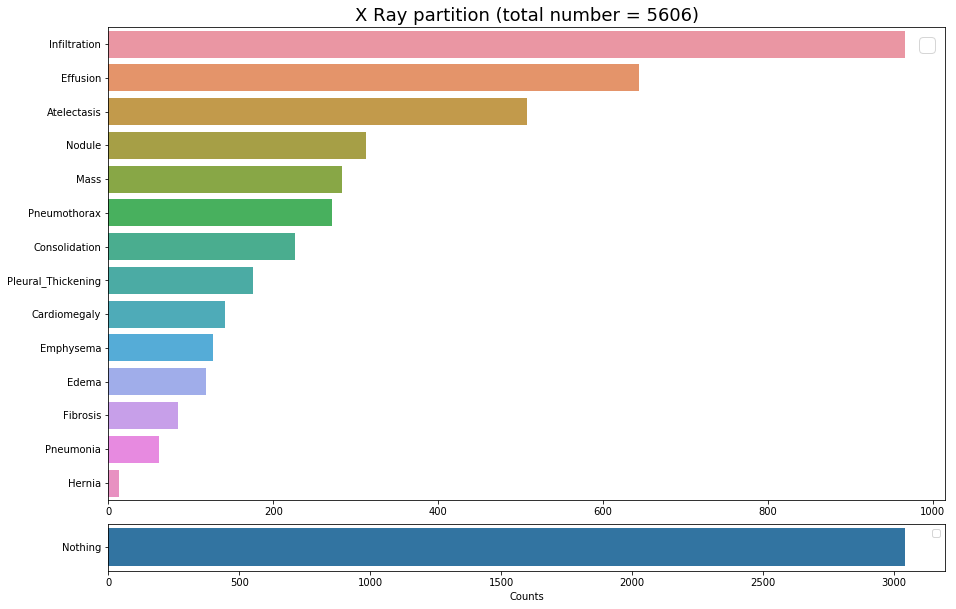

In [7]:
import matplotlib.gridspec as gridspec
import seaborn as sns


#drop unused columns
labels = labels[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]
#create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
for pathology in pathology_list :
    labels[pathology] = labels['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
#remove Y after age
#labels['Age']=labels['Patient Age'].apply(lambda x: x[:-1]).astype(int)

plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(labels,
#             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 5606)',fontsize=18);

labels['Nothing']=labels['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(labels,
 #            id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Counts")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [13]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding"
    Consolidation="Consolidation"
    Infiltration="Infiltration"
    Pneumothorax="Pneumothorax"
    Edema="Edema"
    Emphysema="Emphysema"
    Fibrosis="Fibrosis"
    Effusion="Effusion"
    Pneumonia="Pneumonia"
    Pleural_Thickening="Pleural_Thickening"
    Cardiomegaly="Cardiomegaly"
    Nodule="Nodule"
    Mass = "Mass"
    Hernia="Hernia"
    Atelectasis="Atelectasis"   
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 64
    HEIGHT = 64
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        # Labels
        if NoFinding in finding:
            finding = 0
            y.append(finding)        
        elif Consolidation in finding:
            finding = 1
            y.append(finding)    
        elif Infiltration in finding:
            finding = 2
            y.append(finding)           
        elif Pneumothorax in finding:
            finding = 3
            y.append(finding)
        elif Edema in finding:
            finding = 4
            y.append(finding)
        elif Emphysema in finding:
            finding = 5
            y.append(finding)
        elif Fibrosis in finding:
            finding = 6
            y.append(finding) 
        elif Effusion in finding:
            finding = 7
            y.append(finding)             
        elif Pneumonia in finding:
            finding = 8
            y.append(finding)   
        elif Pleural_Thickening in finding:
            finding = 9
            y.append(finding) 
        elif Cardiomegaly in finding:
            finding = 10
            y.append(finding) 
        elif Nodule in finding:
            finding = 11
            y.append(finding)
        elif Mass in finding:
            finding = 12
            y.append(finding)
        elif Hernia in finding:
            finding = 13
            y.append(finding) 
        elif Atelectasis in finding:
            finding = 14
            y.append(finding) 
#        else:
#            finding = 14
#            y.append(finding)
    return x,y

In [14]:
X,y = proc_images()
df = pd.DataFrame()
df["images"]=X
df["labels"]=y
print(len(df), df.images[0].shape)
print(type(X))

5606 (64, 64, 3)
<class 'list'>


In [15]:
dict_characters = {0: 'No Finding', 1: 'Consolidation', 2: 'Infiltration', 
        3: 'Pneumothorax', 4: 'Edema', 5: 'Emphysema', 6: 'Fibrosis', 7:'Effusion',
        8: 'Pneumonia', 9: 'Pleural_Thickening',10:'Cardiomegaly', 11: 'Nodule', 12: 'Mass', 
        13: 'Hernia', 14: 'Atelectasis'}

print(df.head(10))
print("")
print(dict_characters)

                                              images  labels
0  [[[11, 11, 11], [23, 23, 23], [41, 41, 41], [5...       0
1  [[[5, 5, 5], [5, 5, 5], [6, 6, 6], [5, 5, 5], ...       0
2  [[[32, 32, 32], [2, 2, 2], [3, 3, 3], [7, 7, 7...       0
3  [[[19, 19, 19], [13, 13, 13], [25, 25, 25], [7...       0
4  [[[16, 16, 16], [16, 16, 16], [15, 15, 15], [1...       0
5  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...       2
6  [[[27, 27, 27], [21, 21, 21], [16, 16, 16], [1...       0
7  [[[0, 0, 0], [0, 0, 0], [12, 12, 12], [12, 12,...      11
8  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       0
9  [[[0, 0, 0], [0, 0, 0], [11, 11, 11], [8, 8, 8...       0

{0: 'No Finding', 1: 'Consolidation', 2: 'Infiltration', 3: 'Pneumothorax', 4: 'Edema', 5: 'Emphysema', 6: 'Fibrosis', 7: 'Effusion', 8: 'Pneumonia', 9: 'Pleural_Thickening', 10: 'Cardiomegaly', 11: 'Nodule', 12: 'Mass', 13: 'Hernia', 14: 'Atelectasis'}


### Distribution of Pixel Intensities within a representative Image

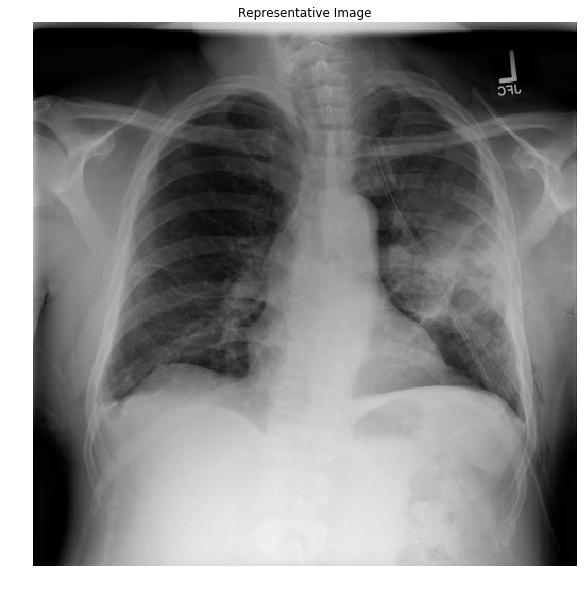

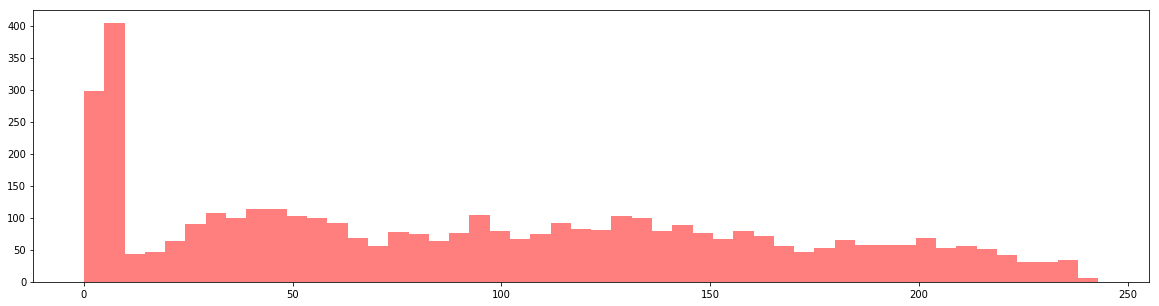

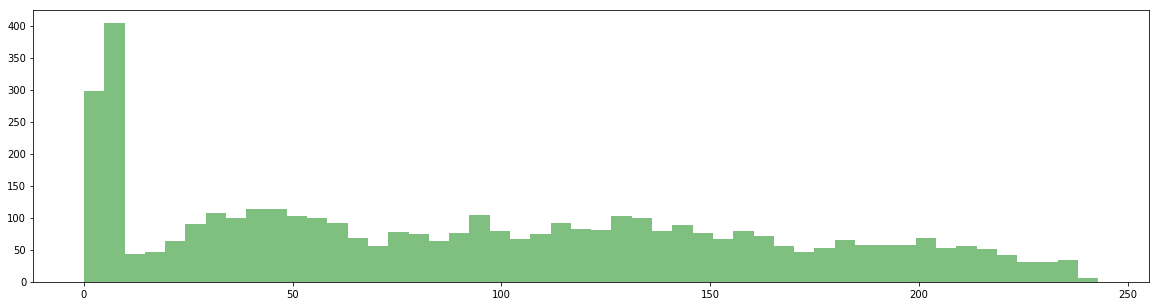

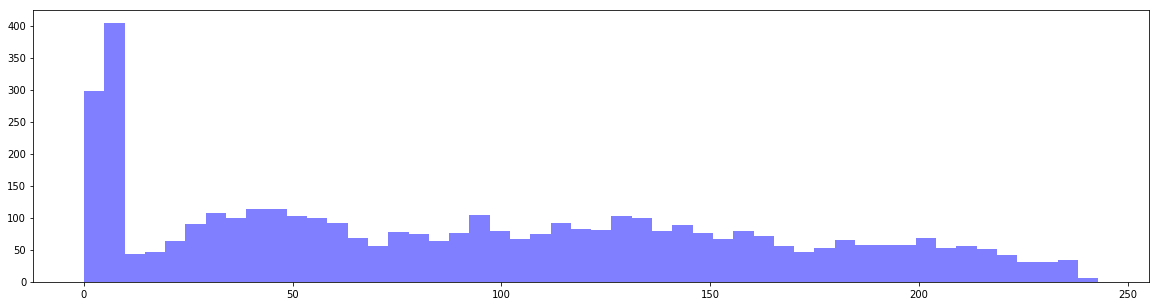

In [16]:
i= 1 # Try 0, 1, 2.. for negative images and -1, -2, -3 for positive images and compare the histograms.
xi = X[i]


def plotArray(array):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotArray(xi)


# plt.imshow(xi)
# plt.axis('off')
plt.title('Representative Image')
plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.figure(figsize=(20,5))
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.figure(figsize=(20,5))
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

In [17]:
X=np.array(X)
X=X/255.0

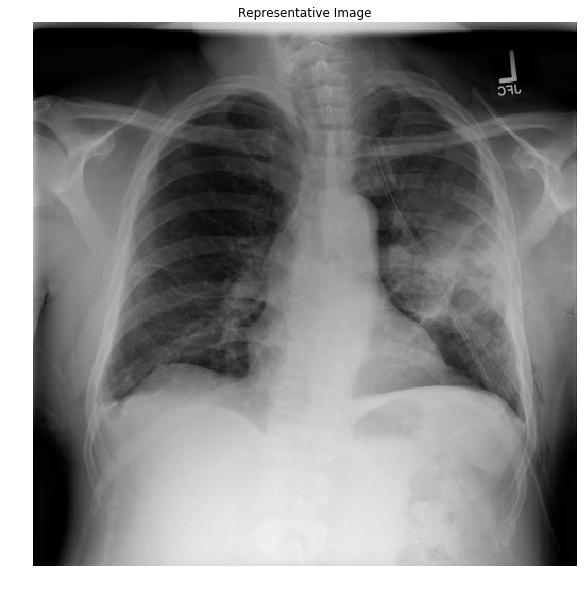

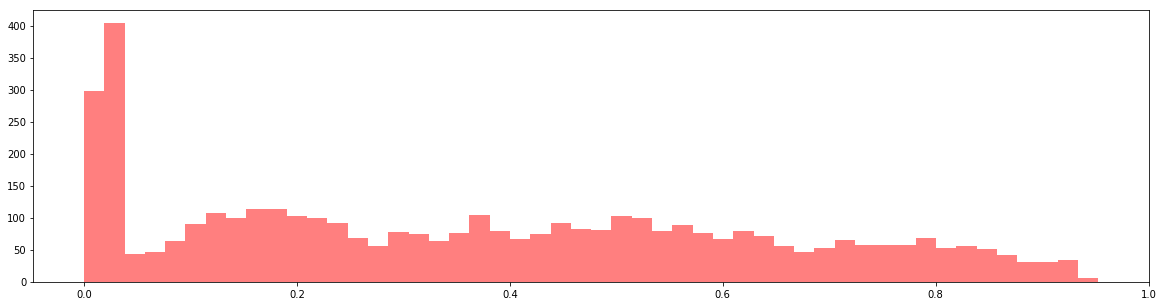

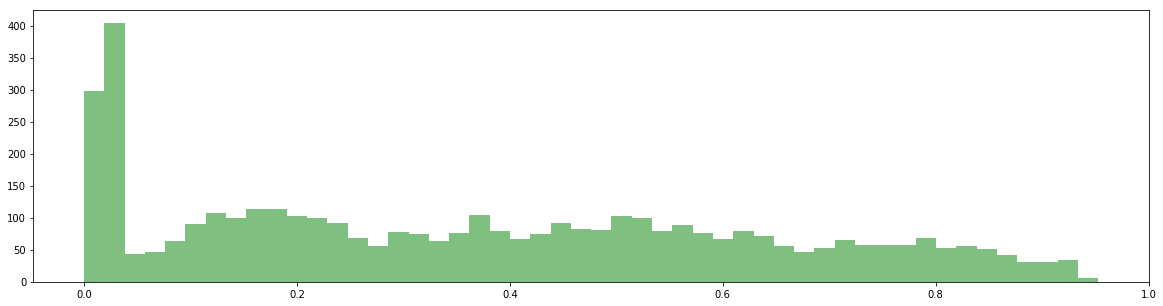

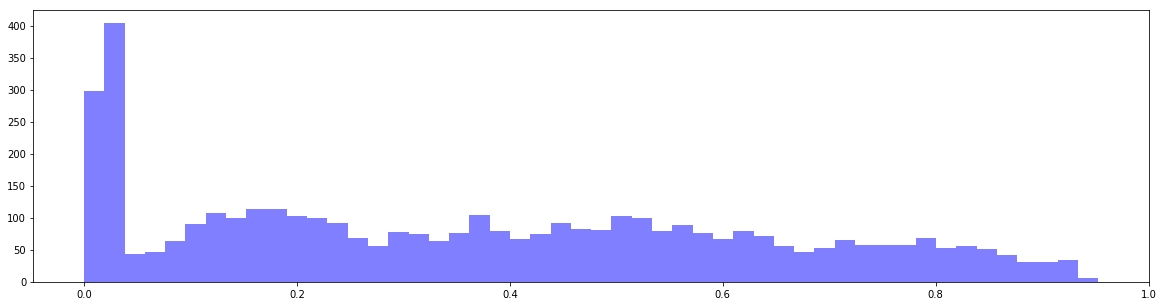

In [18]:
i= 1 # Try 0, 1, 2.. for negative images and -1, -2, -3 for positive images and compare the histograms.
xi = X[i]


def plotArray(array):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotArray(xi)


# plt.imshow(xi)
# plt.axis('off')
plt.title('Representative Image')
plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.figure(figsize=(20,5))
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.figure(figsize=(20,5))
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

{0: 'No Finding', 1: 'Consolidation', 2: 'Infiltration', 3: 'Pneumothorax', 4: 'Edema', 5: 'Emphysema', 6: 'Fibrosis', 7: 'Effusion', 8: 'Pneumonia', 9: 'Pleural_Thickening', 10: 'Cardiomegaly', 11: 'Nodule', 12: 'Mass', 13: 'Hernia', 14: 'Atelectasis'}


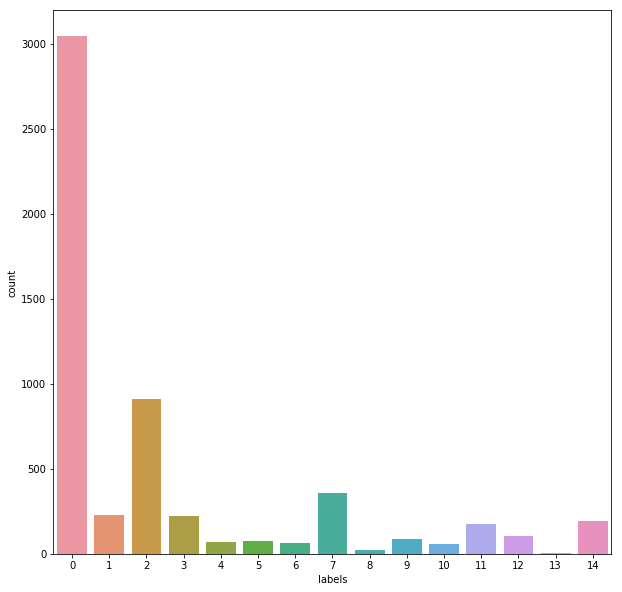

In [19]:
lab = df['labels']
dict = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

### Imbalanced Sample Size Need to address

In [20]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.utils import class_weight
import sklearn

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Data Shape:", len(X_train), X_train[0].shape)
print("Testing Data Shape:", len(X_test), X_test[0].shape)

Training Data Shape: (4484, 64, 64, 3)
Testing Data Shape: (1122, 64, 64, 3)
Training Data Shape: 4484 (64, 64, 3)
Testing Data Shape: 1122 (64, 64, 3)


In [23]:
Y_trainHot = to_categorical(Y_train, num_classes = 20)
Y_testHot = to_categorical(Y_test, num_classes = 20)

In [24]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y), y)
print(class_weight)

[ 0.12277705  1.65368732  0.41069597  1.69878788  5.57810945  4.85367965
  6.02795699  1.04981273 16.24927536  4.2469697   6.79515152  2.14789272
  3.55936508 53.39047619  1.94652778]


Epoch 1/10
141/140 [==============================] - 7s 50ms/step - loss: 2.7260 - acc: 0.4566
Epoch 2/10
141/140 [==============================] - 5s 38ms/step - loss: 1.8790 - acc: 0.5166
Epoch 3/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7955 - acc: 0.5337
Epoch 4/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7840 - acc: 0.5417
Epoch 5/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7498 - acc: 0.5483
Epoch 6/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7391 - acc: 0.5417
Epoch 7/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7466 - acc: 0.5441
Epoch 8/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7079 - acc: 0.5477
Epoch 9/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7091 - acc: 0.5452
Epoch 10/10
141/140 [==============================] - 5s 38ms/step - loss: 1.7116 - acc: 0.5468

Keras CNN #2B - accuracy: 0.5160427807

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



                    precision    recall  f1-score   support

        No Finding       0.52      1.00      0.68       580
     Consolidation       0.00      0.00      0.00        45
      Infiltration       0.25      0.00      0.01       206
      Pneumothorax       0.00      0.00      0.00        40
             Edema       0.00      0.00      0.00        11
         Emphysema       0.00      0.00      0.00        17
          Fibrosis       0.00      0.00      0.00        13
          Effusion       0.00      0.00      0.00        80
         Pneumonia       0.00      0.00      0.00         6
Pleural_Thickening       0.00      0.00      0.00        15
      Cardiomegaly       0.00      0.00      0.00         8
            Nodule       0.00      0.00      0.00        44
              Mass       0.00      0.00      0.00        16
            Hernia       0.00      0.00      0.00         2
       Atelectasis       0.00      0.00      0.00        39

       avg / total       0.31      0.

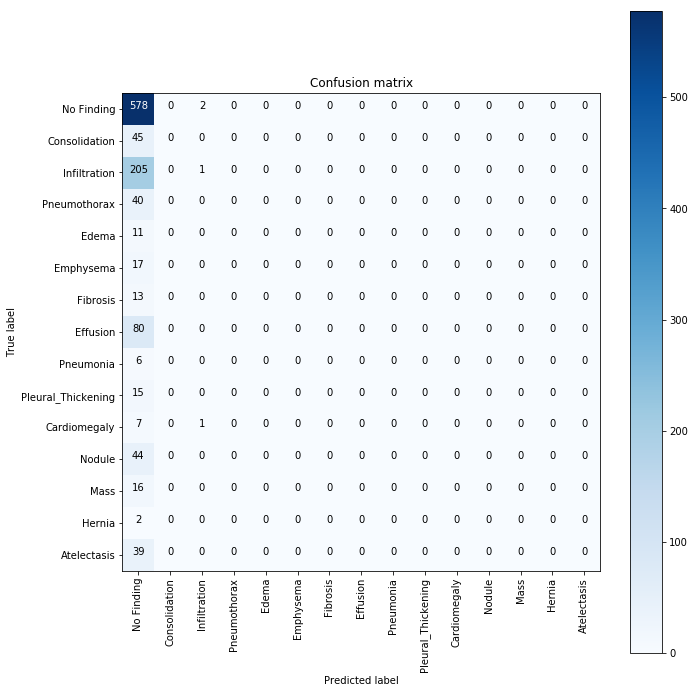

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



def runCNNconfusion(a,b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 20
    epochs = 10
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs, class_weight = class_weight)



    score = model.evaluate(c,d, verbose=0)
        
    print('')
    print('Keras CNN #2B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(dict_characters.values())), sep='')    
   

    # Predict the values from the validation dataset
    Y_pred = model.predict(c)
    # Convert hot vectors prediction results to list of classes
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert hot vectors validation observations to list of classes
    Y_true = np.argmax(d,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 

runCNNconfusion(X_train, Y_trainHot, X_test, Y_testHot)

In [26]:
newweights = class_weight*8
print(newweights)

[  0.98221638  13.22949853   3.28556777  13.59030303  44.62487562
  38.82943723  48.22365591   8.39850187 129.9942029   33.97575758
  54.36121212  17.18314176  28.47492063 427.12380952  15.57222222]


In [32]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding"
    Consolidation="Consolidation"
    Infiltration="Infiltration"
    Pneumothorax="Pneumothorax"
    Edema="Edema"
    Emphysema="Emphysema"
    Fibrosis="Fibrosis"
    Effusion="Effusion"
    Pneumonia="Pneumonia"
    Pleural_Thickening="Pleural_Thickening"
    Cardiomegaly="Cardiomegaly"
    Nodule ="Nodule"
    Mass = "Mass"
    Hernia="Hernia"
    Atelectasis="Atelectasis"
    
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 64
    HEIGHT = 64

    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
#1,13,3,13,44,39,48,8,129,33,54,17,374,15,30
        # Labels
        if NoFinding in finding:
            finding = 0
            y.append(finding)
        elif Consolidation in finding:
            finding = 1
            y.append(finding) 
            for i in range(13):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Infiltration in finding:
            finding = 2
            y.append(finding)
            for i in range(3):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Pneumothorax in finding:
            finding = 3
            y.append(finding)
            for i in range(13):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Edema in finding:
            finding = 4
            y.append(finding)
            for i in range(44):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Emphysema in finding:
            finding = 5
            y.append(finding)
            for i in range(39):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Fibrosis in finding:
            finding = 6
            y.append(finding) 
            for i in range(48):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Effusion in finding:
            finding = 7
            y.append(finding) 
            for i in range(8):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Pneumonia in finding:
            finding = 8
            y.append(finding)
            for i in range(129):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Pleural_Thickening in finding:
            finding = 9
            y.append(finding) 
            for i in range(33):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Cardiomegaly in finding:
            finding = 10
            y.append(finding) 
            for i in range(54):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Nodule in finding:
            finding = 11
            y.append(finding) 
            for i in range(30):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Mass in finding:
            finding = 12
            y.append(finding) 
            for i in range(30):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        elif Hernia in finding:
            finding = 13
            y.append(finding) 
            for i in range(374):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Atelectasis in finding:
            finding = 14
            y.append(finding) 
            for i in range(14):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
    #    else:
    #        finding = 14
    #        y.append(finding)
    return x,y

In [45]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding"
    Consolidation="Consolidation"
    Infiltration="Infiltration"
    Pneumothorax="Pneumothorax"
    Edema="Edema"
    Emphysema="Emphysema"
    Fibrosis="Fibrosis"
    Effusion="Effusion"
    Pneumonia="Pneumonia"
    Pleural_Thickening="Pleural_Thickening"
    Cardiomegaly="Cardiomegaly"
    Nodule="Nodule"
    Mass = "Mass"
    Hernia="Hernia"
    Atelectasis="Atelectasis"   
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 64
    HEIGHT = 64
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        # Labels
        if NoFinding in finding:
            finding = 0
            y.append(finding)        
        elif Consolidation in finding:
            finding = 1
            y.append(finding)
            for i in range(13):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Infiltration in finding:
            finding = 2
            y.append(finding)
            for i in range(3):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Pneumothorax in finding:
            finding = 3
            y.append(finding)
            for i in range(13):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Edema in finding:
            finding = 4
            y.append(finding)
            for i in range(44):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Emphysema in finding:
            finding = 5
            y.append(finding)
            for i in range(39):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Fibrosis in finding:
            finding = 6
            y.append(finding)
            for i in range(48):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Effusion in finding:
            finding = 7
            y.append(finding)
            for i in range(8):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Pneumonia in finding:
            finding = 8
            y.append(finding)
            for i in range(129):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Pleural_Thickening in finding:
            finding = 9
            y.append(finding)
            for i in range(33):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Cardiomegaly in finding:
            finding = 10
            y.append(finding)
            for i in range(54):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Nodule in finding:
            finding = 11
            y.append(finding)
            for i in range(20):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Mass in finding:
            finding = 12
            y.append(finding)
            for i in range(30):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Hernia in finding:
            finding = 13
            y.append(finding)
            for i in range(374):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
        elif Atelectasis in finding:
            finding = 14
            y.append(finding)
            for i in range(14):
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                y.append(finding)
#        else:
#            finding = 14
#            y.append(finding)
    return x,y

In [46]:
X2,y2 = proc_images()
dfNew = pd.DataFrame()
dfNew["images"]=X2
dfNew["labels"]=y2
X2=np.array(X2)
X2=X2/255.0
print(len(dfNew), dfNew.images[0].shape)

46686 (64, 64, 3)


{0: 'No Finding', 1: 'Consolidation', 2: 'Infiltration', 3: 'Pneumothorax', 4: 'Edema', 5: 'Emphysema', 6: 'Fibrosis', 7: 'Effusion', 8: 'Pneumonia', 9: 'Pleural_Thickening', 10: 'Cardiomegaly', 11: 'Nodule', 12: 'Mass', 13: 'Hernia', 14: 'Atelectasis'}


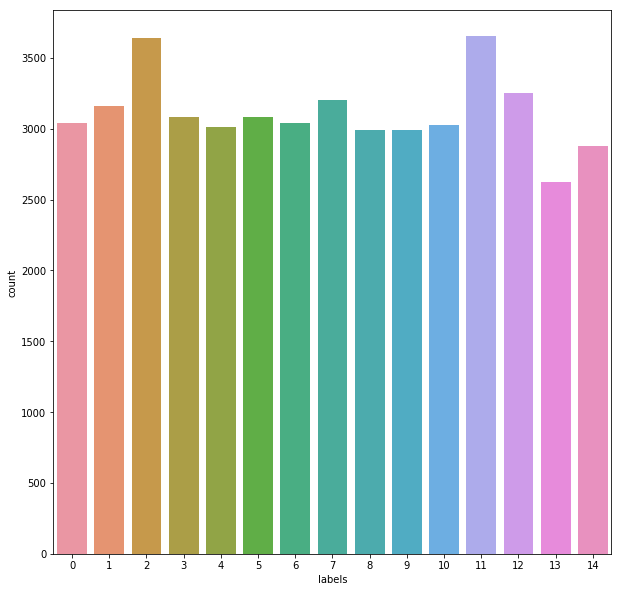

In [47]:
newLab = dfNew['labels']
newImg = dfNew['images']
dist = newLab.value_counts()
sns.countplot(newLab)
print(dict_characters)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, y2, test_size=0.2)

In [49]:
Y_trainHot = to_categorical(Y_train, num_classes = 20)
Y_testHot = to_categorical(Y_test, num_classes = 20)
print(X_train.shape)

(37348, 64, 64, 3)


In [50]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y), y)
print(class_weight)

[ 0.12277705  1.65368732  0.41069597  1.69878788  5.57810945  4.85367965
  6.02795699  1.04981273 16.24927536  4.2469697   6.79515152  2.14789272
  3.55936508 53.39047619  1.94652778]


Epoch 1/10
1168/1167 [==============================] - 45s 39ms/step - loss: 2.1225 - acc: 0.3413
Epoch 2/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.9312 - acc: 0.6930
Epoch 3/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.5675 - acc: 0.8118
Epoch 4/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.4197 - acc: 0.8606
Epoch 5/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.3416 - acc: 0.8844
Epoch 6/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.2885 - acc: 0.9052
Epoch 7/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.2526 - acc: 0.9161
Epoch 8/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.2264 - acc: 0.9269
Epoch 9/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.1979 - acc: 0.9363
Epoch 10/10
1168/1167 [==============================] - 45s 38ms/step - loss: 0.1879 - acc: 0.9393

Keras CN

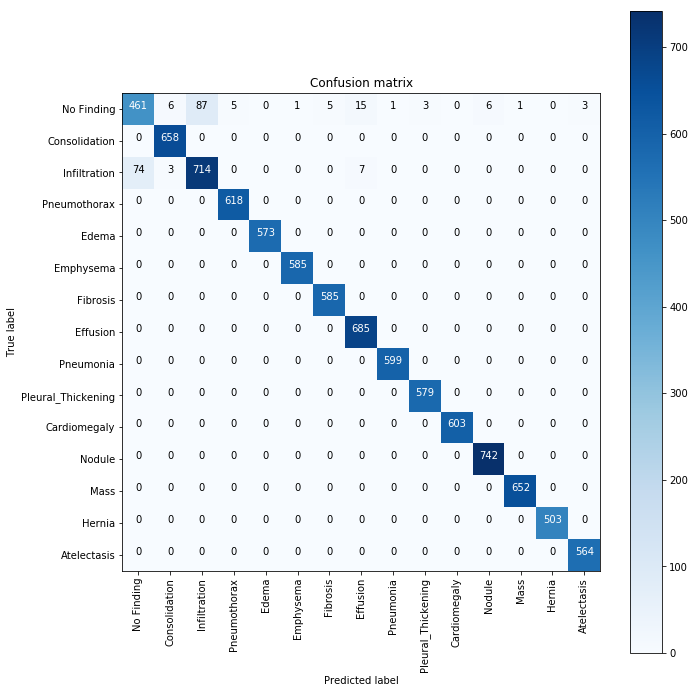

In [51]:
runCNNconfusion(X_train, Y_trainHot, X_test, Y_testHot)